Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8906 - loss: 0.3459 - val_accuracy: 0.9871 - val_loss: 0.0390
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9841 - loss: 0.0515 - val_accuracy: 0.9901 - val_loss: 0.0310
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9890 - loss: 0.0334 - val_accuracy: 0.9889 - val_loss: 0.0337
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9923 - loss: 0.0249 - val_accuracy: 0.9887 - val_loss: 0.0353
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9938 - loss: 0.0175 - val_accuracy: 0.9904 - val_loss: 0.0303
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9953 - loss: 0.0148 - val_accuracy: 0.9923 - val_loss: 0.0275
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9959 - loss: 0.0113 - val_accuracy: 0.9926 - val_loss: 0.0271
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9966 - loss: 0.0106 - val

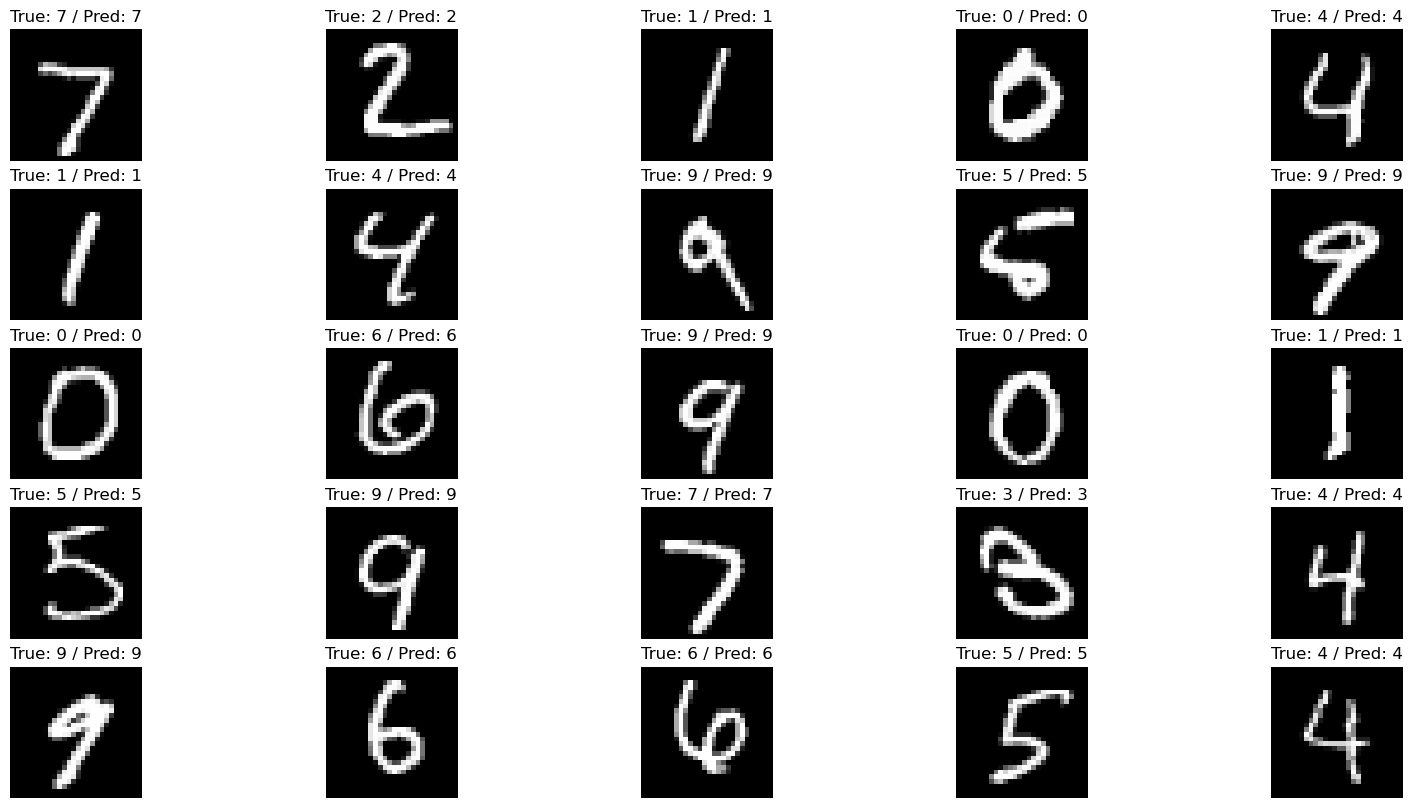

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

# Flatten images
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model training
model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

# Model evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Prediction
predictions = model.predict(test_images)

# Visualize images along with predictions
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {test_labels[i]} / Pred: {tf.argmax(predictions[i])}")
    plt.axis('off')

plt.show()

Training data shape (60000, 28, 28) , test data shape (60000,)


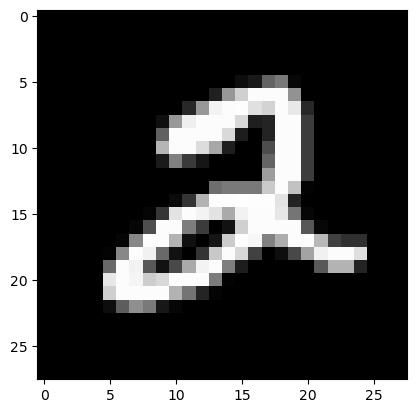

x_train shape: (60000, 28, 28, 1)
train samples  60000
test samples 10000
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.1371 - loss: 2.2948 - val_accuracy: 0.2845 - val_loss: 2.2336
Testing loss: 2.2335588932037354
Testing accuracy: 0.28450000286102295


In [2]:
import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras import backend as K
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure
n_classes = 10
input_shape = (28, 28, 1)
batch_size = 128
num_classes = 10
epochs = 1

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print("Training data shape {} , test data shape {}".format(X_train.shape, Y_train.shape))

img = X_train[5]

plt.imshow(img, cmap='gray')
plt.show()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Y_train = to_categorical(Y_train, n_classes)
Y_test = to_categorical(Y_test, n_classes)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print('train samples ',X_train.shape[0],)
print('test samples',X_test.shape[0])

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

history = model.fit(X_train, Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, Y_test))

output_score = model.evaluate(X_test, Y_test, verbose=0)
print('Testing loss:', output_score[0])
print('Testing accuracy:', output_score[1])